In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

explenation features:  
  
Pclass: 1 = First class 2 = Second class 3 = Third class  
SibSp: Number of siblings  
Parch: Number of Parents/Children Aboard  
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

In [3]:
df = pd.read_csv("titanic_correct.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Dropping the name, ticket, cabin and because they are not needed
df_cleaned = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_cleaned.info()
print(df_cleaned.isnull().sum())
# in Age and Embarked are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [6]:
# Impute missing Age values with the median age
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode (most frequent value)
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

print(df_cleaned.isnull().sum()) 
df_cleaned.head()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Encoding data
df_encoded = df_cleaned.copy()
df_encoded = pd.get_dummies(df_encoded,columns=['Sex'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded,columns=['Embarked'])
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


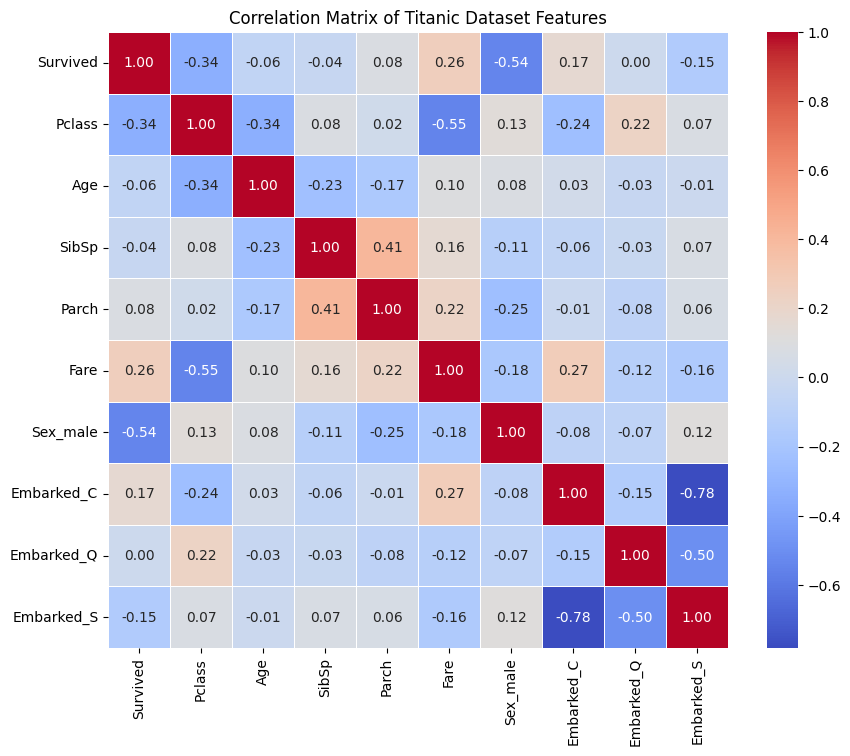

In [8]:
#Correlation Matrix
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()

# Using seaborn to create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()


There is a high positive corrolation between Survived and Sex because survived has value 1 and female has value 1. Women (and children) were allowed to get on lifeboats first.  
there is a high negative corrolation between Pclass and Fare because first class is value 1 and third class is value 3 thus how higher the value, how lower the Fare.  
  
there is a negative corrolation of -0.34 between Age and Pclass. I want to look a little bit deeper on that.

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_24428\1082220503.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_age_counts = df_encoded.groupby(['Pclass', pd.cut(df_encoded['Age'], bins=age_bins)]).size().unstack(fill_value=0)


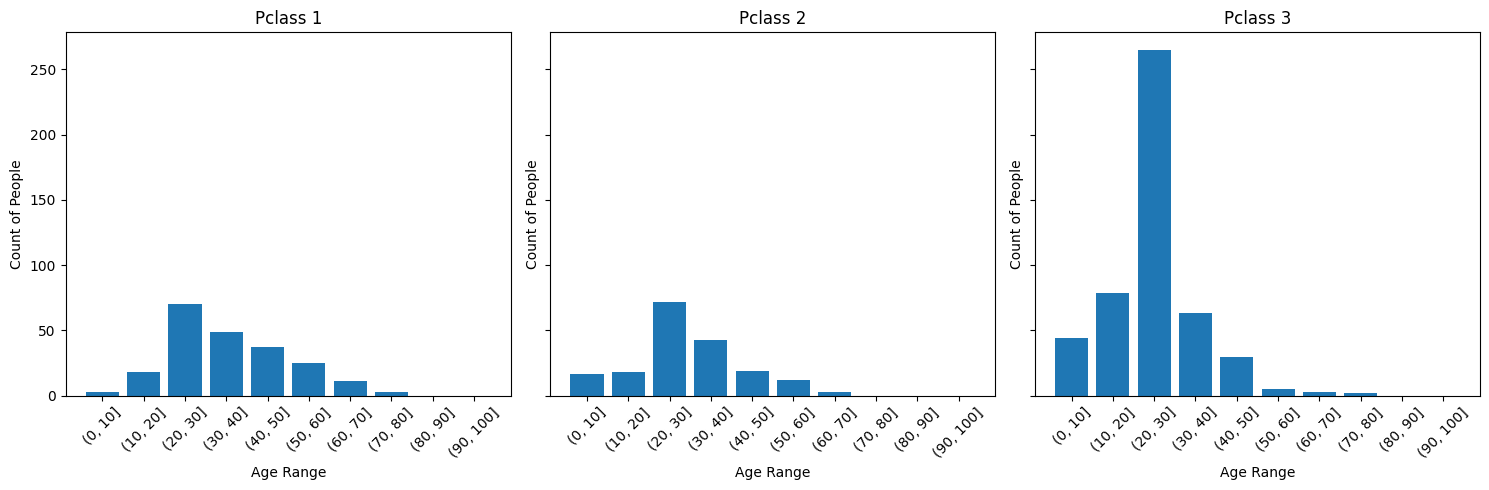

In [9]:
# Define age bins (0-9, 10-19, 20-29, etc.)
age_bins = range(0, 101, 10)

# Group by both 'Pclass' and 'AgeRange', and count the entries
pclass_age_counts = df_encoded.groupby(['Pclass', pd.cut(df_encoded['Age'], bins=age_bins)]).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Loop through each Pclass
for i, pclass in enumerate(pclass_age_counts.index):
    age_counts = pclass_age_counts.loc[pclass]
    axes[i].bar(age_counts.index.astype(str), age_counts.values)
    axes[i].set_title(f'Pclass {pclass}')
    axes[i].set_xlabel('Age Range')
    axes[i].set_ylabel('Count of People')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()


The negative corrolation of -0.34 is because there are a lot of young people in the third class. So how higher the value of the class how lower the age.

Now that we have examined the correlations, we will take a look at how the survival rates look.

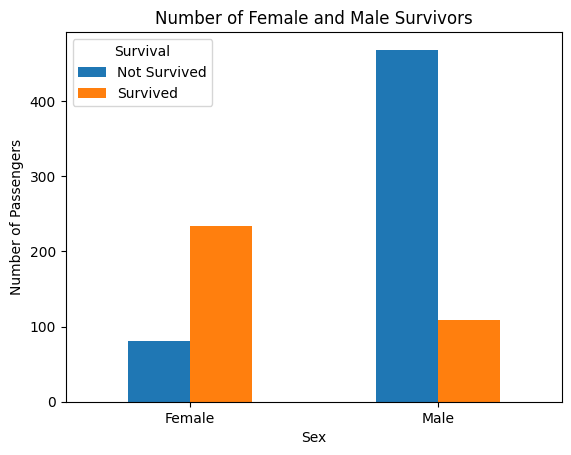

Number of women over 60: 233


In [ ]:
survival_count = df_encoded.groupby(['Sex_male', 'Survived']).size().unstack(fill_value=0)
survival_count.index = ['Female', 'Male']  

labels = []
if 0 in survival_count.columns:  
    labels.append('Not Survived')
if 1 in survival_count.columns: 
      labels.append('Survived')


survival_count.plot(kind='bar', stacked=False)

plt.title('Number of Female and Male Survivors')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0) 

plt.legend(labels, title='Survival')

plt.show()

#correct

Now we are going to check what percentage of the age classes survived the disaster.

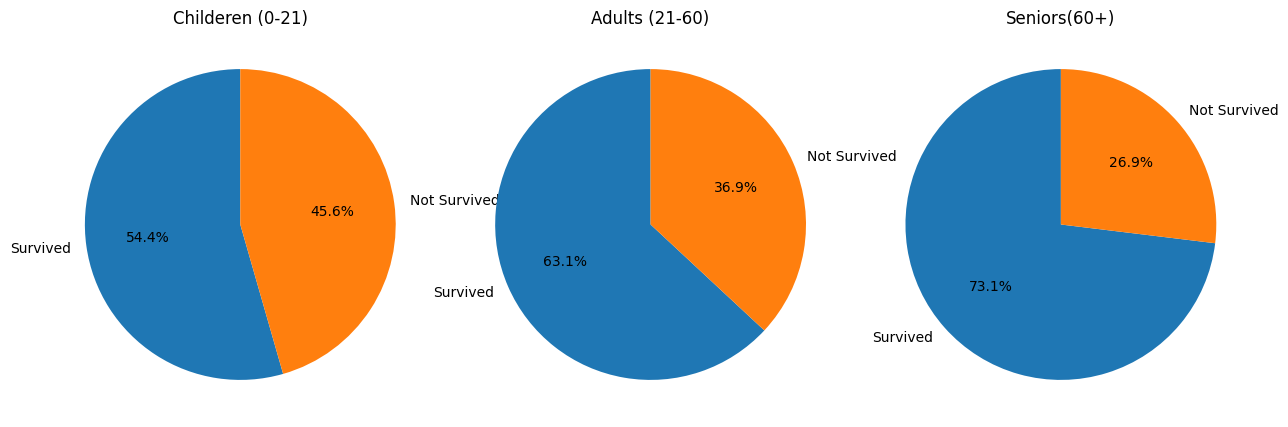

In [ ]:
def plot_survival_pie(df_encoded, age_min, age_max, title):
    subset = df_encoded[(df_encoded['Age'] >= age_min) & (df_encoded['Age'] < age_max)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100
    
    labels = []
    if 1 in survived_counts.index:
        labels.append('Survived')
    if 0 in survived_counts.index:
        labels.append('Not Survived')

    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')


plt.figure(figsize=(15, 5))

# childeren (0-21)
plt.subplot(1, 3, 1)
plot_survival_pie(df_encoded, 0, 21, title="Childeren (0-21)") #In the days of the titanic, you were an adult from the age of 21

# adulds (21-60)
plt.subplot(1, 3, 2)
plot_survival_pie(df_encoded, 21, 60, title="Adults (21-60)")

# 60-plussers
plt.subplot(1, 3, 3)
plot_survival_pie(df_encoded, 60, 150, title="Seniors(60+)")

plt.show()

#correct

This result is not what we expected. The survival rate among seniors is very high and then low among children (we also applied these calculations to the original dataset and this gave us the same result). So the calculations are wrong or the dataset is not completely truthful or there is a large imbalance in age distribution.

We are going to make a further distinction between men and women.

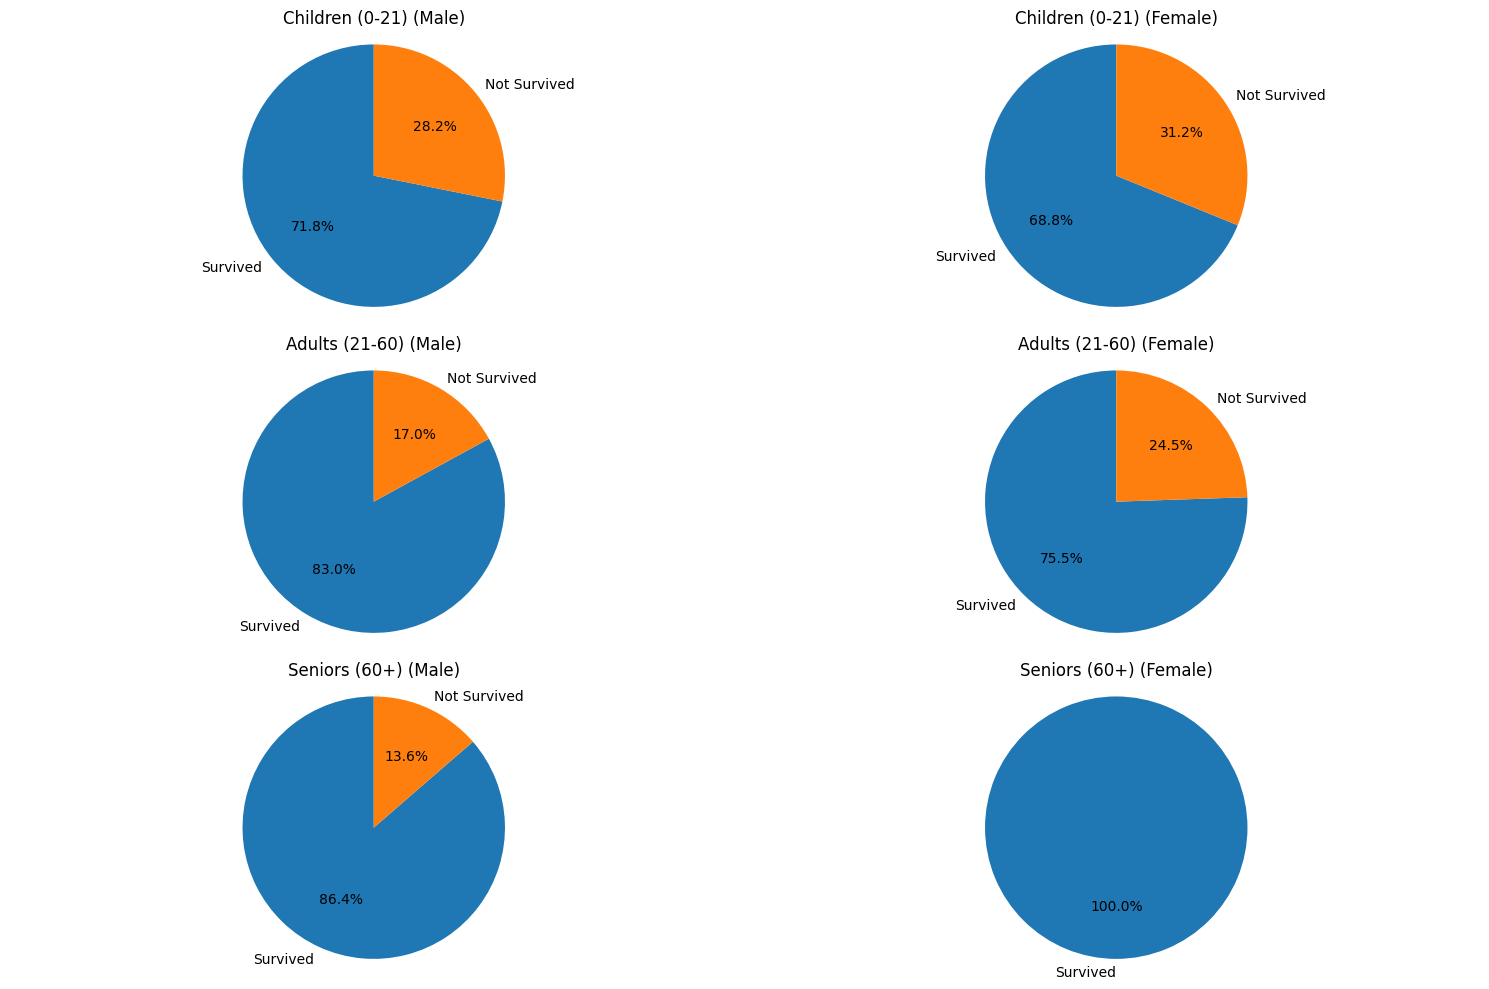

Number of male over 60: 19
Number of women over 60: 3


In [111]:
def plot_survival_pie(df, age_min, age_max, sex, title):
    subset = df[(df['Age'] >= age_min) & (df['Age'] < age_max) & (df['Sex_male'] == sex)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100
    
    labels = []
    if 1 in survived_counts.index:
        labels.append('Survived')
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"{title} ({'Male' if sex else 'Female'})")
    plt.axis('equal')  # Houdt de taart rond

# Plotten van de pie charts
plt.figure(figsize=(15, 10))

# Kinderen (0-21 jaar)
plt.subplot(3, 2, 1)
plot_survival_pie(df_encoded, 0, 21, True, title="Children (0-21)")
plt.subplot(3, 2, 2)
plot_survival_pie(df_encoded, 0, 21, False, title="Children (0-21)")

# Volwassenen (21-60 jaar)
plt.subplot(3, 2, 3)
plot_survival_pie(df_encoded, 21, 60, True, title="Adults (21-60)")
plt.subplot(3, 2, 4)
plot_survival_pie(df_encoded, 21, 60, False, title="Adults (21-60)")

# Senioren (60+ jaar)
plt.subplot(3, 2, 5)
plot_survival_pie(df_encoded, 60, 150, True, title="Seniors (60+)")
plt.subplot(3, 2, 6)
plot_survival_pie(df_encoded, 60, 150, False, title="Seniors (60+)")

plt.tight_layout()
plt.show()

num_women_over_60 = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] > 60)].shape[0]
print("Number of male over 60:", num_women_over_60)
num_women_over_60 = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] > 60)].shape[0]
print("Number of women over 60:", num_women_over_60)

#correct

We see that there are many surviving seniors. This may be because there are only 22 seniors in our dataset.

we'll take a look at what the percentages are by class.

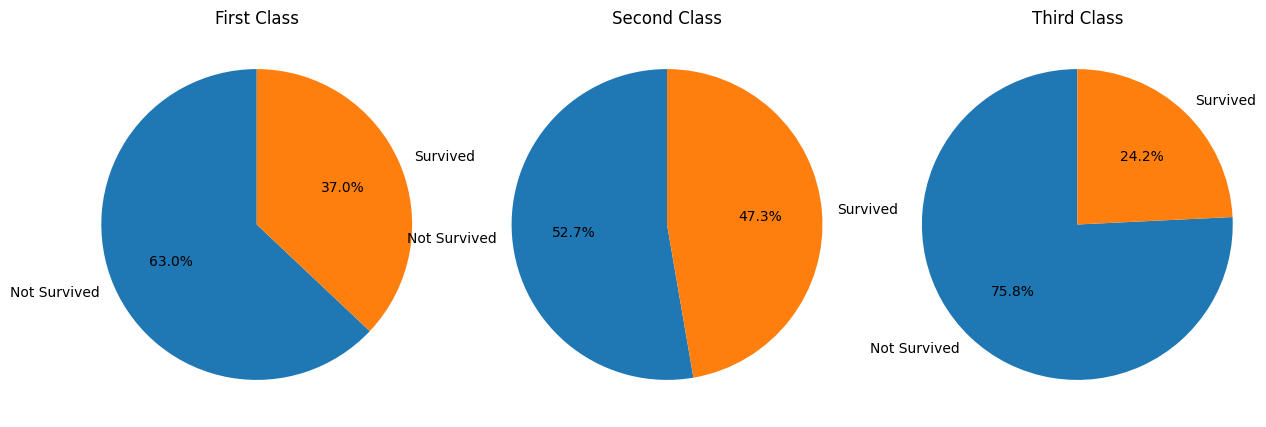

In [112]:
def plot_survival_pie(df_encoded, pclass, title):
    subset = df_encoded[df_encoded['Pclass'] == pclass]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100
    
    labels = []
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    if 1 in survived_counts.index:
        labels.append('Survived')

        
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')


plt.figure(figsize=(15, 5))

# Eerste klasse
plt.subplot(1, 3, 1)
plot_survival_pie(df_encoded, 1, title="First Class")

# Tweede klasse
plt.subplot(1, 3, 2)
plot_survival_pie(df_encoded, 2, title="Second Class")

# Derde klasse
plt.subplot(1, 3, 3)
plot_survival_pie(df_encoded, 3, title="Third Class")

plt.show()


#correct

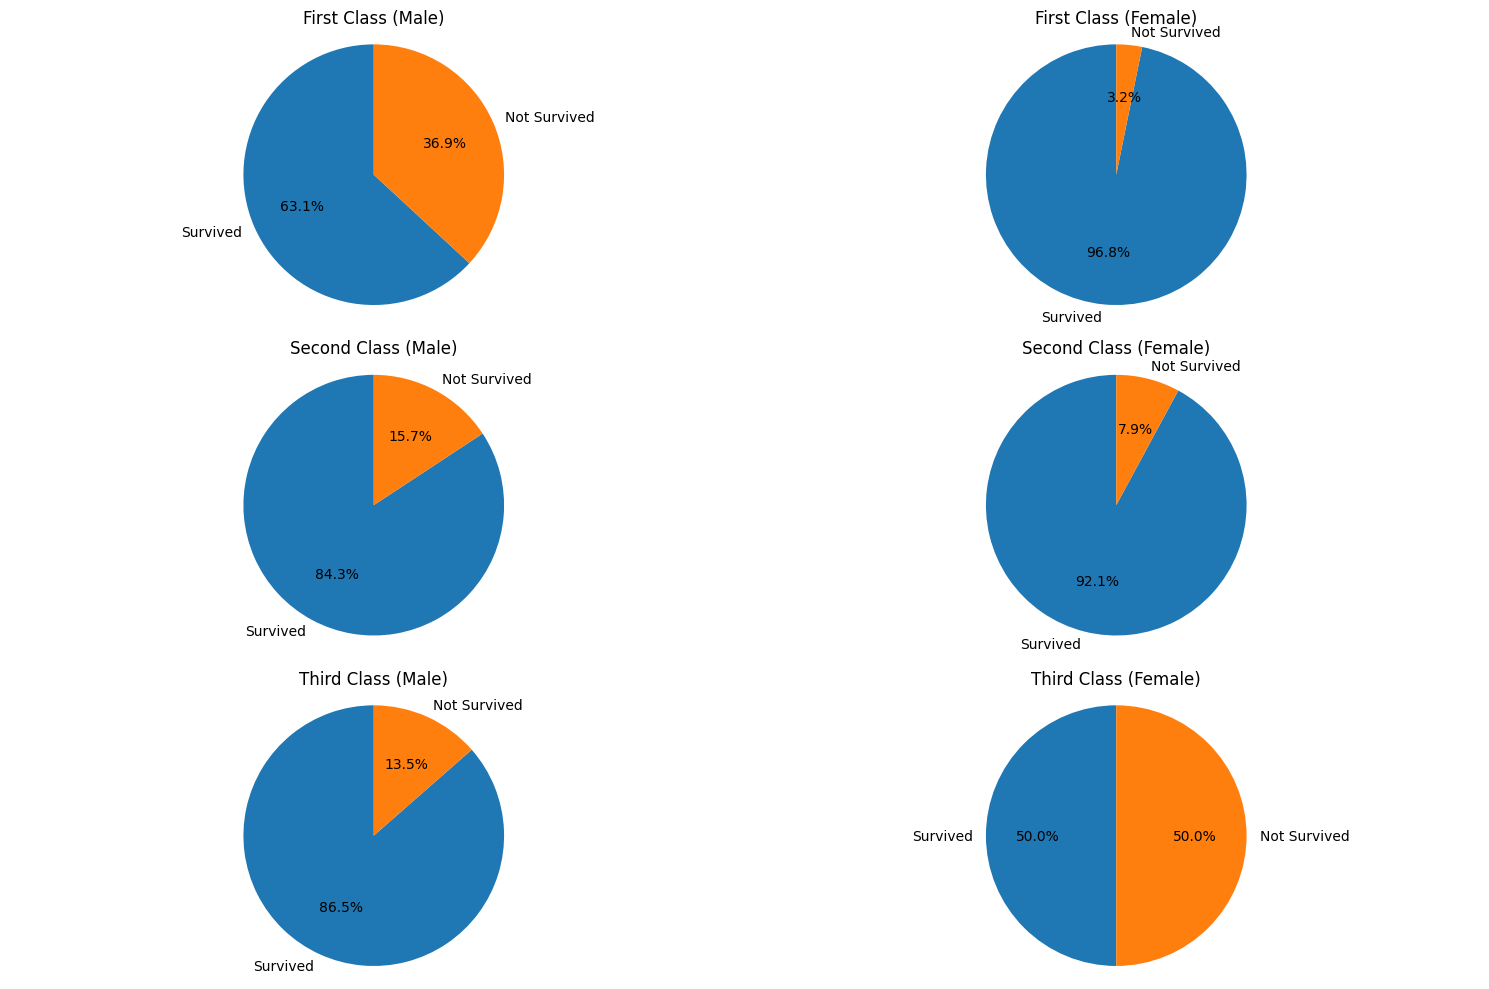

Number of men under 21 in first class: 7
Number of men in first class: 122
Number of women under 21 in first class: 14
Number of women in first class: 94


Number of men under 21 in second class: 19
Number of men in second class: 108
Number of women under 21 in second class: 16
Number of women in second class: 76


Number of men under 21 in third class: 77
Number of men in third class: 347
Number of women under 21 in third class: 47
Number of women in third class: 144


In [114]:
def plot_survival_pie(df_encoded, pclass, sex, title):
    subset = df_encoded[(df_encoded['Pclass'] == pclass) & (df_encoded['Sex_male'] == sex)]
    survived_counts = subset['Survived'].value_counts(normalize=True) * 100

    # Dynamisch labels genereren afhankelijk van beschikbare data
    labels = []
    if 1 in survived_counts.index:
        labels.append('Survived')
    if 0 in survived_counts.index:
        labels.append('Not Survived')
    
    plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f"{title} ({'Male' if sex else 'Female'})")
    plt.axis('equal')

# Plotten van de pie charts
plt.figure(figsize=(15, 10))

# Eerste klasse - Mannen en Vrouwen
plt.subplot(3, 2, 1)
plot_survival_pie(df_encoded, 1, True, title="First Class")
plt.subplot(3, 2, 2)
plot_survival_pie(df_encoded, 1, False, title="First Class")

# Tweede klasse - Mannen en Vrouwen
plt.subplot(3, 2, 3)
plot_survival_pie(df_encoded, 2, True, title="Second Class")
plt.subplot(3, 2, 4)
plot_survival_pie(df_encoded, 2, False, title="Second Class")

# Derde klasse - Mannen en Vrouwen
plt.subplot(3, 2, 5)
plot_survival_pie(df_encoded, 3, True, title="Third Class")
plt.subplot(3, 2, 6)
plot_survival_pie(df_encoded, 3, False, title="Third Class")

plt.tight_layout()
plt.show()


num_men_under_21_first_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of men under 21 in first class:", num_men_under_21_first_class)
num_men_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of men in first class:", num_men_second_class)
num_women_under_21_first_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of women under 21 in first class:", num_women_under_21_first_class)
num_women_first_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 1)].shape[0]
print("Number of women in first class:", num_women_first_class)
print('\n')

num_men_under_21_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of men under 21 in second class:", num_men_under_21_second_class)
num_men_second_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of men in second class:", num_men_second_class)
num_women_under_21_second_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of women under 21 in second class:", num_women_under_21_second_class)
num_women_second_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 2)].shape[0]
print("Number of women in second class:", num_women_second_class)
print('\n')

num_men_under_21_third_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of men under 21 in third class:", num_men_under_21_third_class)
num_men_third_class = df_encoded[(df_encoded['Sex_male'] == True) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of men in third class:", num_men_third_class)
num_women_under_21_third_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Age'] < 21) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of women under 21 in third class:", num_women_under_21_third_class)
num_women_third_class = df_encoded[(df_encoded['Sex_male'] == False) & (df_encoded['Pclass'] == 3)].shape[0]
print("Number of women in third class:", num_women_third_class)

#correct

The survivors of the first and second class are very high as well as it is very strange that so many men of the third class survived the disaster. Especially when you see that there were few children among them.

## Conclusion

Based on these calculations, there is a large imbalance in the age distribution and class distribution and the dataset does not appear to be entirely truthful.

# Model

In [10]:
%pip install scikit-learn
#%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df_encoded, test_size=0.2, random_state=42, stratify=df_encoded['Survived'])

In [13]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['Survived'])

In [118]:
print(train.shape)
print(test.shape)
print(validate.shape)
test.head()

(712, 10)
(89, 10)
(90, 10)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
799,0,3,30.0,1,1,24.1500,False,False,False,True
397,0,2,46.0,0,0,26.0000,True,False,False,True
614,0,3,35.0,0,0,8.0500,True,False,False,True
428,0,3,28.0,0,0,7.7500,True,False,True,False
485,0,3,28.0,3,1,25.4667,False,False,False,True


In [14]:
print(train['Survived'].value_counts())
print(test['Survived'].value_counts())
print(validate['Survived'].value_counts())

Survived
0    439
1    273
Name: count, dtype: int64
Survived
0    55
1    34
Name: count, dtype: int64
Survived
0    55
1    35
Name: count, dtype: int64


# Intermezzo: Uploading data to Amazon S3

# Don't run this!

In [ ]:
# bucket='c135194a3427158l8213279t1w722091310768-labbucket-foftcvpkmni4'

# prefix='lab3'

# train_file='vertebral_train.csv'
# test_file='vertebral_test.csv'
# validate_file='vertebral_validate.csv'

# import os

# s3_resource = boto3.Session().resource('s3')
# def upload_s3_csv(filename, folder, dataframe):
#     csv_buffer = io.StringIO()
#     dataframe.to_csv(csv_buffer, header=False, index=False)
#     s3_resource.Bucket(bucket).Object(os.path.join(prefix, folder, filename)).put(Body=csv_buffer.getvalue())

In [ ]:
# upload_s3_csv(train_file, 'train', train)
# upload_s3_csv(test_file, 'test', test)
# upload_s3_csv(validate_file, 'validate', validate)

# Upload train, test and validate to CSV file

In [ ]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False, header=False)
validate.to_csv('validate.csv', index=False, header=False)

# PyCaret model

https://www.youtube.com/watch?v=NbBoZQZ3bxo&t=175s&ab_channel=GregHogg 

In [15]:
df_caret_train = pd.read_csv('train.csv')
df_caret_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,28.0,0,0,56.4958,True,False,False,True
1,0,2,28.0,0,0,0.0000,True,False,False,True
2,0,1,28.0,0,0,221.7792,True,False,False,True
3,1,3,18.0,0,1,9.3500,False,False,False,True
4,1,2,31.0,1,1,26.2500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
707,1,3,28.0,0,0,7.8792,False,False,True,False
708,1,1,35.0,0,0,512.3292,False,True,False,False
709,0,3,48.0,1,3,34.3750,False,False,False,True
710,0,1,47.0,0,0,38.5000,True,False,False,True


In [16]:
from pycaret.regression import *

s= setup(df_caret_train, target='Survived', normalize=True)

,Description,Value
0,Session id,4010
1,Target,Survived
2,Target type,Regression
3,Original data shape,"(712, 10)"
4,Transformed data shape,"(712, 10)"
5,Transformed train set shape,"(498, 10)"
6,Transformed test set shape,"(214, 10)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()